## Aula 4 - Enem 2018

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
%precision %.2f
pd.options.display.float_format = '{:,.2f}'.format

path = "C:/Users/Admin/Documents/Quarentena Dados/dados/MICRODADOS_ENEM_2018_SAMPLE_43278.csv"
dataset = pd.read_csv(path)
dataset.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180009327796,2018,2112209,Timon,21,MA,34.00,M,1.00,1,...,A,B,A,A,C,A,B,B,A,A
1,180012890374,2018,3557105,Votuporanga,35,SP,14.00,M,0.00,1,...,A,C,A,B,E,B,D,B,D,D
2,180008223824,2018,2506301,Guarabira,25,PB,20.00,F,0.00,2,...,A,B,A,A,D,A,B,B,A,E
3,180007859645,2018,3534807,Ouro Verde,35,SP,17.00,F,0.00,2,...,A,B,A,A,E,A,A,A,B,A
4,180013499517,2018,3523107,Itaquaquecetuba,35,SP,19.00,M,0.00,3,...,A,B,A,A,D,B,B,B,A,A


In [3]:
dataset.shape

(137844, 137)

In [4]:
grades_columns = ['NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
grades_dataset = dataset[grades_columns].dropna() #Removendo os alunos que não realizaram toda a prova
grades_dataset.columns = ['ciencias_humanas', 'ciencias_natureza', 'linguagens_codigo', 'matematica', 'redacao']
grades_dataset.head()

,ciencias_humanas,ciencias_natureza,linguagens_codigo,matematica,redacao
1,671.30,523.10,661.60,738.00,680.00
2,531.70,409.20,389.00,438.10,600.00
3,505.50,452.30,448.50,544.90,400.00
6,505.20,428.50,521.00,436.80,560.00
8,575.70,491.80,524.40,487.60,660.00


In [5]:
grades_dataset.shape[0]

97270

#### Portanto, na nossa amostra, 40574 alunos não fizeram a prova inteira (todas as disciplinas das áreas de conhecimento). De fato:

In [6]:
dataset.shape[0] - grades_dataset.shape[0]

40574

#### Qual a correlação entre as notas das áreas de conhecimento? Podemos tirar alguma conclusão?

In [7]:
corr = grades_dataset.corr()
corr

,ciencias_humanas,ciencias_natureza,linguagens_codigo,matematica,redacao
ciencias_humanas,1.00,0.57,0.70,0.53,0.50
ciencias_natureza,0.57,1.00,0.60,0.58,0.51
linguagens_codigo,0.70,0.60,1.00,0.57,0.56
matematica,0.53,0.58,0.57,1.00,0.48
redacao,0.50,0.51,0.56,0.48,1.00


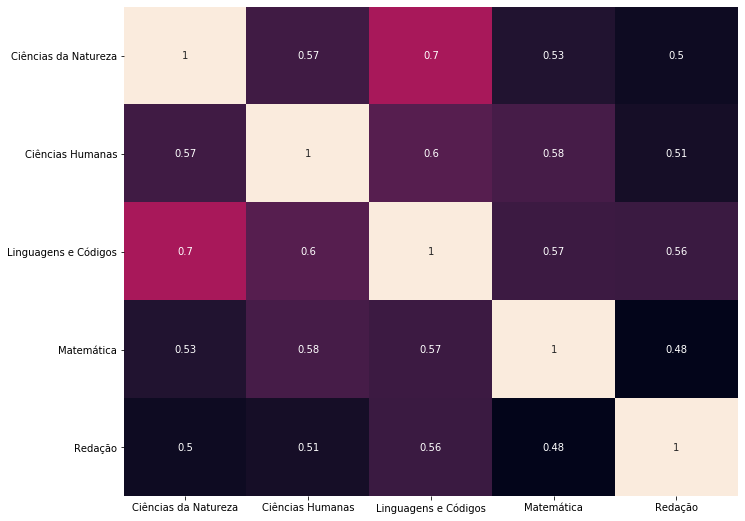

In [8]:
#Configurando a figura do matplotlib
f, ax = plt.subplots(figsize=(11, 9))
labels = ['Ciências da Natureza', 'Ciências Humanas', 'Linguagens e Códigos', 'Matemática', 'Redação']
#Mapa de calor do seaborn
sns.heatmap(corr, annot = True, cbar=False, xticklabels=labels, yticklabels=labels)

#### Ou podemos fazer o pairplot 

<Figure size 576x432 with 0 Axes>

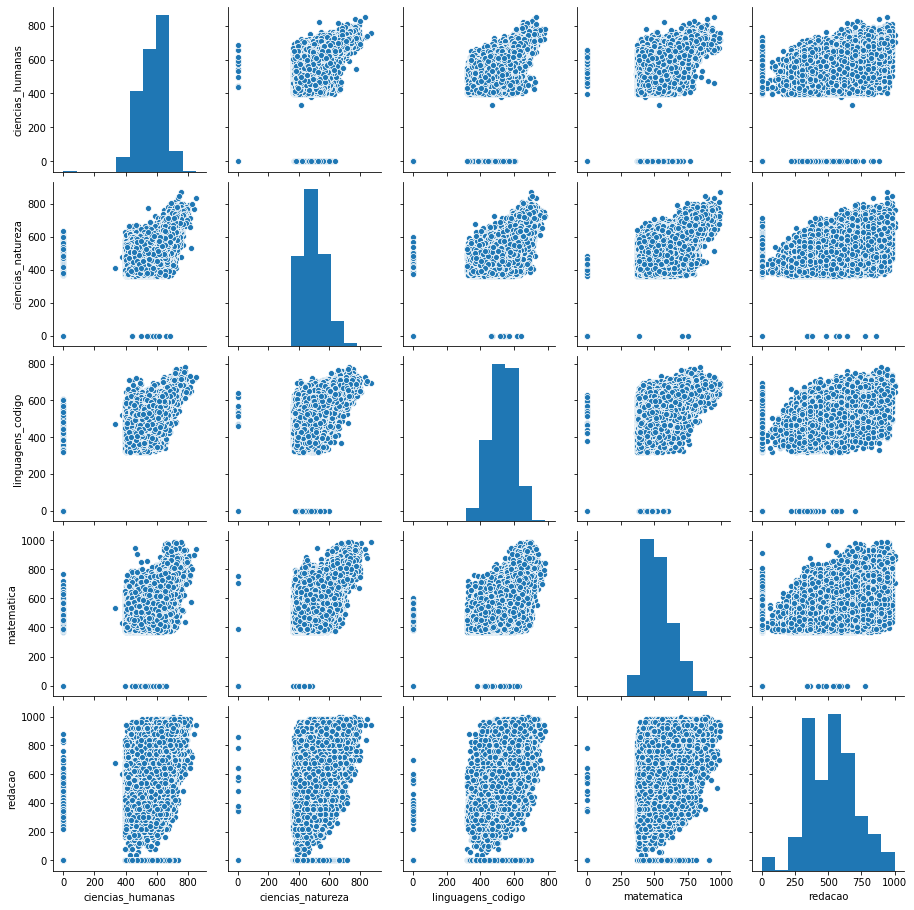

In [9]:
plt.figure(figsize=(8,6))
sns.pairplot(data=grades_dataset)

## Desafios - Aula 4

#### Desafio 1: Ao invés de dar um drop no dataset para remover os alunos que não fizeram a prova inteira, preencher a nota do aluno com algum número (Nota 0? Média? Mediana?) se ele não teve presença na aplicação da prova.

In [10]:
#do dicionário, temos que se o aluno compareceu a prova, ele recebe 1.0 na 
#coluna de presença; se ele faltou, ele recebe 0.0; se ele foi eliminado, ele 
#recebe 2.0

#preenchendo as notas dos alunos que não estavam presentes com 0
dataset_n0 = dataset.copy()

dataset_n0.loc[dataset_n0.TP_PRESENCA_CN.isin(['0.0', '2.0']), ['NU_NOTA_CN']] = 0
dataset_n0.loc[dataset_n0.TP_PRESENCA_CH.isin(['0.0', '2.0']), ['NU_NOTA_CH']] = 0
dataset_n0.loc[dataset_n0.TP_PRESENCA_LC.isin(['0.0', '2.0']), ['NU_NOTA_LC']] = 0
dataset_n0.loc[dataset_n0.TP_PRESENCA_MT.isin(['0.0', '2.0']), ['NU_NOTA_MT']] = 0

In [11]:
dataset_n0[['TP_PRESENCA_CN', 'NU_NOTA_CN', 'TP_PRESENCA_CH', 'NU_NOTA_CH', 'TP_PRESENCA_LC', 
            'NU_NOTA_LC', 'TP_PRESENCA_MT', 'NU_NOTA_MT']].head()

,TP_PRESENCA_CN,NU_NOTA_CN,TP_PRESENCA_CH,NU_NOTA_CH,TP_PRESENCA_LC,NU_NOTA_LC,TP_PRESENCA_MT,NU_NOTA_MT
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,1.00,523.10,1.00,671.30,1.00,661.60,1.00,738.00
2,1.00,409.20,1.00,531.70,1.00,389.00,1.00,438.10
3,1.00,452.30,1.00,505.50,1.00,448.50,1.00,544.90
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [12]:
#preenchendo as notas dos alunos que não estavam presentes com a nota média (considerando os NAs no cálculo)
dataset_nmean = dataset.copy()

dataset_nmean.loc[dataset_nmean.TP_PRESENCA_CN.isin(['0.0', '2.0']), ['NU_NOTA_CN']] = dataset.NU_NOTA_CN.mean()
dataset_nmean.loc[dataset_nmean.TP_PRESENCA_CH.isin(['0.0', '2.0']), ['NU_NOTA_CH']] = dataset.NU_NOTA_CH.mean()
dataset_nmean.loc[dataset_nmean.TP_PRESENCA_LC.isin(['0.0', '2.0']), ['NU_NOTA_LC']] = dataset.NU_NOTA_LC.mean()
dataset_nmean.loc[dataset_nmean.TP_PRESENCA_MT.isin(['0.0', '2.0']), ['NU_NOTA_MT']] = dataset.NU_NOTA_MT.mean()

In [13]:
dataset_nmean[['TP_PRESENCA_CN', 'NU_NOTA_CN', 'TP_PRESENCA_CH', 'NU_NOTA_CH', 'TP_PRESENCA_LC', 'NU_NOTA_LC', 'TP_PRESENCA_MT', 'NU_NOTA_MT']].head()

,TP_PRESENCA_CN,NU_NOTA_CN,TP_PRESENCA_CH,NU_NOTA_CH,TP_PRESENCA_LC,NU_NOTA_LC,TP_PRESENCA_MT,NU_NOTA_MT
0,0.00,493.63,0.00,568.31,0.00,526.59,0.00,535.18
1,1.00,523.10,1.00,671.30,1.00,661.60,1.00,738.00
2,1.00,409.20,1.00,531.70,1.00,389.00,1.00,438.10
3,1.00,452.30,1.00,505.50,1.00,448.50,1.00,544.90
4,0.00,493.63,0.00,568.31,0.00,526.59,0.00,535.18


#### Desafio 2: Melhorar a matriz de correlação!

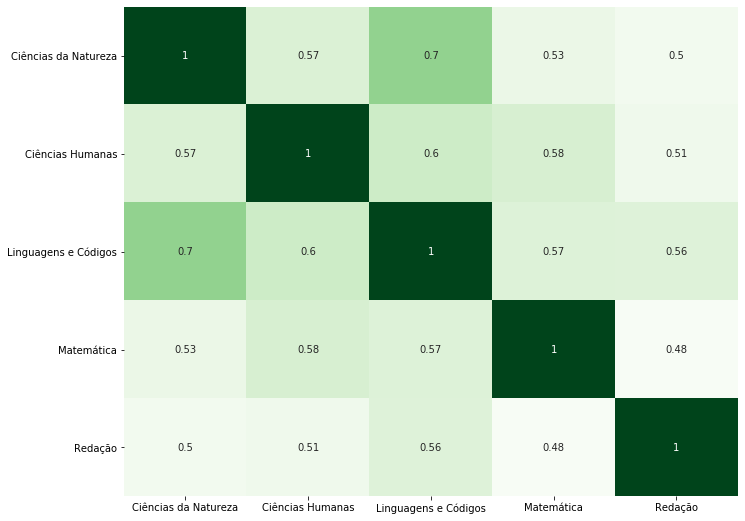

In [14]:
#Configurando a figura do matplotlib
f, ax = plt.subplots(figsize=(11, 9))
labels = ['Ciências da Natureza', 'Ciências Humanas', 'Linguagens e Códigos', 'Matemática', 'Redação']
#Mapa de calor do seaborn
sns.heatmap(corr, annot = True, cmap="Greens", cbar=False, xticklabels=labels, yticklabels=labels)

#### Desafio 3: Pairplot dos acertos de cada área de conhecimento (CN, CH, MT, LC e nota pura da redação). Usar o gabarito e as respostas.

In [15]:
#Vetores de resposta nulo, ficaremos com nota 0
answers_columns = ['TX_RESPOSTAS_CH', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'NU_NOTA_REDACAO']
dataset_answers = dataset_n0[answers_columns]
dataset_answers[['TX_RESPOSTAS_CH', 'TX_RESPOSTAS_CN', 
                 'TX_RESPOSTAS_MT', 'TX_RESPOSTAS_LC']] = dataset_answers[['TX_RESPOSTAS_CH', 'TX_RESPOSTAS_CN', 
                                                                           'TX_RESPOSTAS_MT', 'TX_RESPOSTAS_LC']].replace(np.nan, '0')
dataset_answers['NU_NOTA_REDACAO'] = dataset_answers.NU_NOTA_REDACAO.astype(float)
dataset_answers.head()

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,TX_RESPOSTAS_CH,TX_RESPOSTAS_CN,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,NU_NOTA_REDACAO
0,0,0,0,0,nan
1,ADECAADBACECBEEDBEDBABEBCBACCEBCAAECCDEDABACD,CCAADAEEDCDAEEABADDECACBEEDDBDCCCEDACCADAACAC,CBEDB99999ECADEABEADEAACABDADACDCCBCEEBBADCDAB...,ADDEDEEBCAADDEDEBECCBAECECEDBAADEABAECDADECDC,680.00
2,AAACCCBAEBBEBEEAAEDCAAEABDEBBCDCCBADEABADBCAD,AEEEBDBBCADADBBCCCDCCBEEDABACAACCADDBBDACBAAC,99999ABEDADDAACEBDACAEACBAAABDBABCABABABEBBEBB...,ABCBEECAABDDADCACAAAABDDEDACAEEECCDCEBBABBECB,600.00
3,DABECDAECBADCAECDDAECAEDBDDDCABDECCCAABEDADCD,BBDEDDDCDACDADBBBCEAACAAAACECBCADEDBECCAADACB,AEDBB99999DDADECBBEEADABBBECAEBCCACECABBADABCD...,DEBEBEABDABECACDDDECBBDDBCBBCABDAACCECBABDCDA,400.00
4,0,0,0,0,nan


In [16]:
feedback_columns = ['TX_GABARITO_CH', 'TX_GABARITO_CN', 'TX_GABARITO_LC', 'TX_GABARITO_MT']
dataset_feedback = dataset_n0[feedback_columns]
dataset_feedback.replace(np.nan, '0', inplace=True)
dataset_feedback.head()

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,TX_GABARITO_CH,TX_GABARITO_CN,TX_GABARITO_LC,TX_GABARITO_MT
0,0,0,0,0
1,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD
2,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB
3,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX
4,0,0,0,0


In [17]:
dataset_hits = pd.concat([dataset_answers, dataset_feedback], axis=1)
dataset_hits.head()

,TX_RESPOSTAS_CH,TX_RESPOSTAS_CN,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,NU_NOTA_REDACAO,TX_GABARITO_CH,TX_GABARITO_CN,TX_GABARITO_LC,TX_GABARITO_MT
0,0,0,0,0,nan,0,0,0,0
1,ADECAADBACECBEEDBEDBABEBCBACCEBCAAECCDEDABACD,CCAADAEEDCDAEEABADDECACBEEDDBDCCCEDACCADAACAC,CBEDB99999ECADEABEADEAACABDADACDCCBCEEBBADCDAB...,ADDEDEEBCAADDEDEBECCBAECECEDBAADEABAECDADECDC,680.00,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD
2,AAACCCBAEBBEBEEAAEDCAAEABDEBBCDCCBADEABADBCAD,AEEEBDBBCADADBBCCCDCCBEEDABACAACCADDBBDACBAAC,99999ABEDADDAACEBDACAEACBAAABDBABCABABABEBBEBB...,ABCBEECAABDDADCACAAAABDDEDACAEEECCDCEBBABBECB,600.00,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB
3,DABECDAECBADCAECDDAECAEDBDDDCABDECCCAABEDADCD,BBDEDDDCDACDADBBBCEAACAAAACECBCADEDBECCAADACB,AEDBB99999DDADECBBEEADABBBECAEBCCACECABBADABCD...,DEBEBEABDABECACDDDECBBDDBCBBCABDAACCECBABDCDA,400.00,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX
4,0,0,0,0,nan,0,0,0,0


In [18]:
answers_columns = ['TX_RESPOSTAS_CH', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'NU_NOTA_REDACAO']
dataset_answers = dataset_n0[answers_columns]

In [19]:
def calc_hits(knowledge_area: str):
    lst = []
    answers = f"TX_RESPOSTAS_{knowledge_area}"
    feedback = f"TX_GABARITO_{knowledge_area}"
    d = dataset_hits[answers].str.len().max()
    for i, row in dataset_hits[[answers, feedback]].iterrows():
        n = 0
        if len(row[answers]) == 1 or len(row[feedback]) == 1:
            n += 0
        else:
            for i in range(d):
                if row[answers][i] == row[feedback][i]:
                    n += 1
                else:
                    n += 0
        lst.append(n)
    dataset_hits[f"HITS_{knowledge_area}"] = lst

In [20]:
calc_hits(knowledge_area='CN')
calc_hits(knowledge_area='CH')
calc_hits(knowledge_area='LC')
calc_hits(knowledge_area='MT')

In [21]:
dataset_answers.head()

,TX_RESPOSTAS_CH,TX_RESPOSTAS_CN,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,NU_NOTA_REDACAO
0,NaN,NaN,NaN,NaN,nan
1,ADECAADBACECBEEDBEDBABEBCBACCEBCAAECCDEDABACD,CCAADAEEDCDAEEABADDECACBEEDDBDCCCEDACCADAACAC,CBEDB99999ECADEABEADEAACABDADACDCCBCEEBBADCDAB...,ADDEDEEBCAADDEDEBECCBAECECEDBAADEABAECDADECDC,680.00
2,AAACCCBAEBBEBEEAAEDCAAEABDEBBCDCCBADEABADBCAD,AEEEBDBBCADADBBCCCDCCBEEDABACAACCADDBBDACBAAC,99999ABEDADDAACEBDACAEACBAAABDBABCABABABEBBEBB...,ABCBEECAABDDADCACAAAABDDEDACAEEECCDCEBBABBECB,600.00
3,DABECDAECBADCAECDDAECAEDBDDDCABDECCCAABEDADCD,BBDEDDDCDACDADBBBCEAACAAAACECBCADEDBECCAADACB,AEDBB99999DDADECBBEEADABBBECAEBCCACECABBADABCD...,DEBEBEABDABECACDDDECBBDDBCBBCABDAACCECBABDCDA,400.00
4,NaN,NaN,NaN,NaN,nan


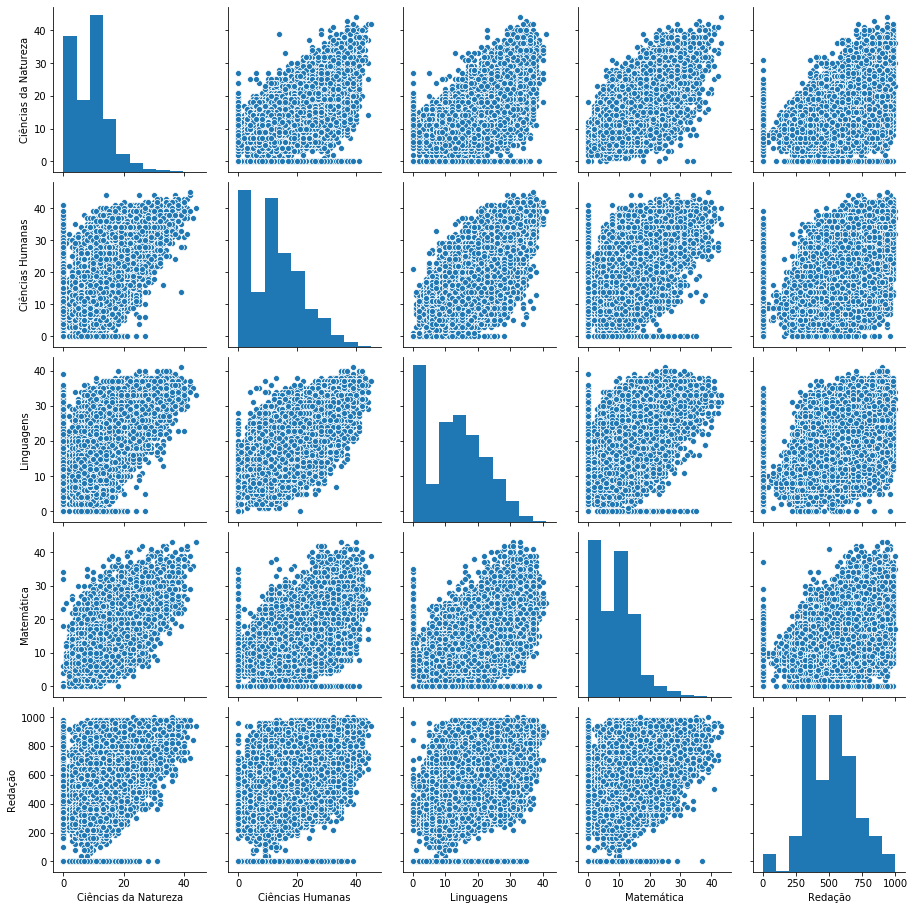

In [22]:
dataset_hits = dataset_hits.rename(columns={'HITS_CN' : 'Ciências da Natureza', 'HITS_CH': 'Ciências Humanas', 
                             'HITS_LC': 'Linguagens', 'HITS_MT': 'Matemática',
                             'NU_NOTA_REDACAO': 'Redação'})
sns.pairplot(dataset_hits[['Ciências da Natureza', 'Ciências Humanas', 'Linguagens', 'Matemática', 'Redação']])

#### Desafio 4: Remover todas as notas zeros. Tomar o cuidado que no desafio 1 já tomamos decisões ligadas a limpeza dos dados também.

In [23]:
dataset_without_0 = dataset_n0.query("NU_NOTA_CN != '0.0' & NU_NOTA_CH != '0.0' & NU_NOTA_LC != '0.0' & NU_NOTA_MT != '0.0'")
dataset_without_0[['TP_PRESENCA_CN', 'NU_NOTA_CN', 'TP_PRESENCA_CH', 'NU_NOTA_CH', 'TP_PRESENCA_LC', 'NU_NOTA_LC', 'TP_PRESENCA_MT', 'NU_NOTA_MT']].head()

,TP_PRESENCA_CN,NU_NOTA_CN,TP_PRESENCA_CH,NU_NOTA_CH,TP_PRESENCA_LC,NU_NOTA_LC,TP_PRESENCA_MT,NU_NOTA_MT
1,1.00,523.10,1.00,671.30,1.00,661.60,1.00,738.00
2,1.00,409.20,1.00,531.70,1.00,389.00,1.00,438.10
3,1.00,452.30,1.00,505.50,1.00,448.50,1.00,544.90
6,1.00,428.50,1.00,505.20,1.00,521.00,1.00,436.80
8,1.00,491.80,1.00,575.70,1.00,524.40,1.00,487.60


#### Desafio 5: Analisar quais questões tiveram mais acertos e erros. 

<h4>Analisaremos as questões da prova azul</h4>

<h8>Código da prova azul de Ciências da Natureza: 447</h8>
<br></br>
<h8>Código da prova azul de Ciências Humanas: 451</h8>
<br></br>
<h8>Código da prova azul de Linguagens e Códigos: 455</h8>
<br></br>
<h8>Código da prova azul de Matemática: 459</h8>

In [24]:
def questions_hits(test, subject):
    answers = test.get(f'TX_RESPOSTAS_{subject}')
    feedback = test.get(f'TX_GABARITO_{subject}')
    
    return pd.Series([int(a==f) for a, f in zip(answers, feedback)])

In [25]:
blue_test_cn = dataset.query("CO_PROVA_CN == '447'")
blue_test_ch = dataset.query("CO_PROVA_CH == '451'")
blue_test_lc = dataset.query("CO_PROVA_LC == '455'")
blue_test_mt = dataset.query("CO_PROVA_MT == '459'")

In [26]:
hits_matrix_cn = blue_test_cn.apply(questions_hits, subject='CN', axis=1)
hits_matrix_ch = blue_test_ch.apply(questions_hits, subject='CH', axis=1)
hits_matrix_lc = blue_test_lc.apply(questions_hits, subject='LC', axis=1)
hits_matrix_mt = blue_test_mt.apply(questions_hits, subject='MT', axis=1)

In [27]:
def graph(df, knowledge_area: str, title: str):
    hits_by_question = pd.DataFrame(df.sum())
    hits_by_question.reset_index(inplace=True)
    hits_by_question.columns = ['question', "hits"]
    hits_by_question['question'] = hits_by_question['question'] + 1
    
    plt.figure(figsize=(18, 8))
    ax = sns.barplot(x='question', y="hits", data=hits_by_question, color="blue")
    
    ax.set_title(f"{title}", fontsize=16)

    plt.show()

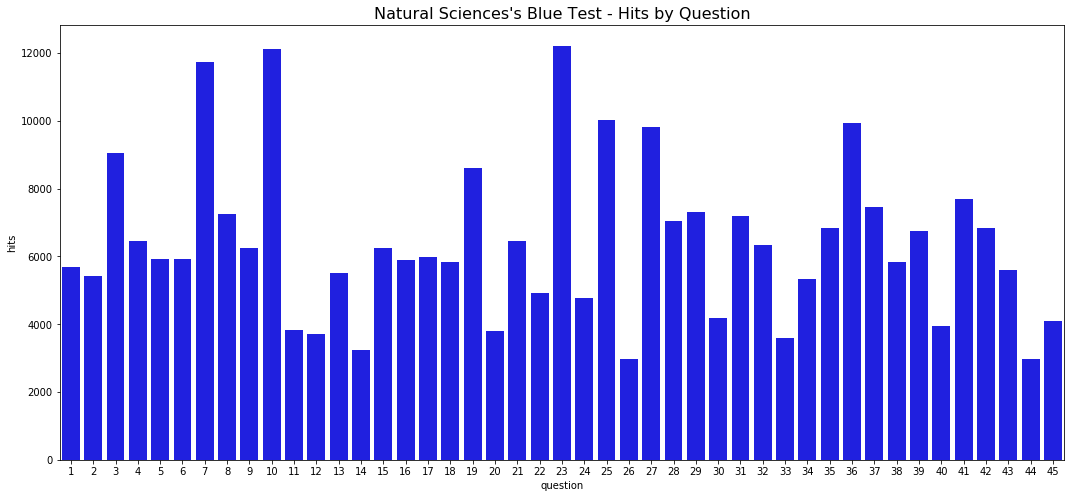

In [28]:
graph(hits_matrix_cn, 'CN', "Natural Sciences's Blue Test - Hits by Question")

<h8>Pelo gráfico, conseguimos ver que a questão de Ciências da Natureza da Prova Azul que obteve mais acertos foi a questão 23, seguida de perto pela questão 10.</h8>
<br></br>
<h8>Ainda pelo gráfico, conseguimos ver que a questão de Ciências da Natureza da Prova Azul que obteve menos acertos foi a questão 26.</h8>

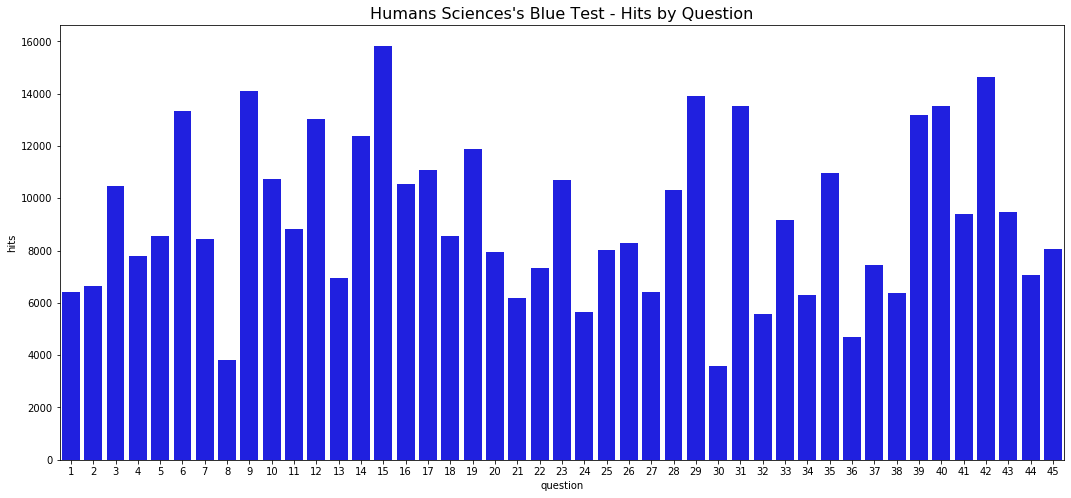

In [29]:
graph(hits_matrix_ch, 'CH', "Humans Sciences's Blue Test - Hits by Question")

<h8>Pelo gráfico, conseguimos ver que a questão de Ciências Humanas da Prova Azul que obteve mais acertos foi a questão 15.</h8>
<br></br>
<h8>Ainda pelo gráfico, conseguimos ver que a questão de Ciências Humanas da Prova Azul que obteve menos acertos foi a questão 30.</h8>

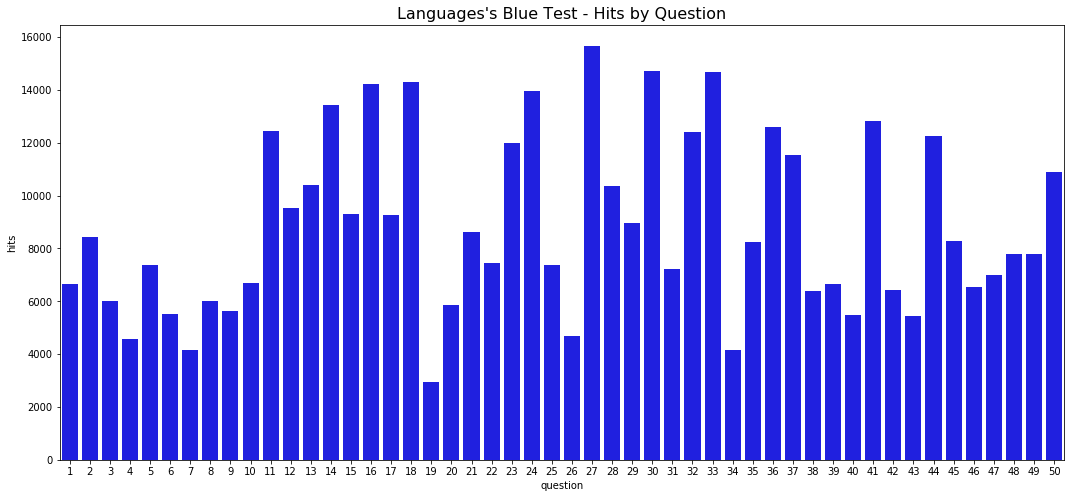

In [30]:
graph(hits_matrix_lc, 'LC', "Languages's Blue Test - Hits by Question")

<h8>Pelo gráfico, conseguimos ver que a questão de Linguagens da Prova Azul que obteve mais acertos foi a questão 27.</h8>
<br></br>
<h8>Ainda pelo gráfico, conseguimos ver que a questão de Linguagens da Prova Azul que obteve menos acertos foi a questão 19.</h8>

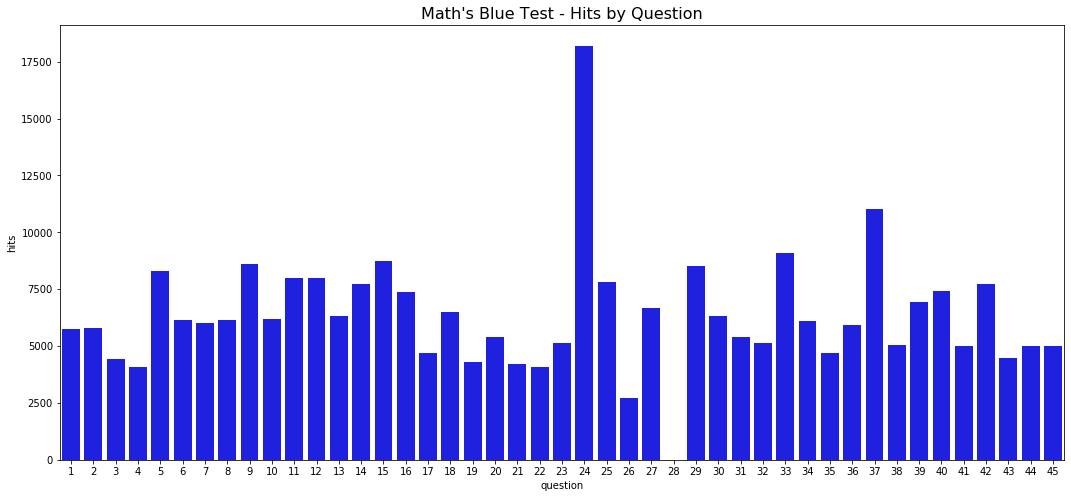

In [31]:
graph(hits_matrix_mt, 'MT', "Math's Blue Test - Hits by Question")

<h8>Pelo gráfico, conseguimos ver que a questão de Matemática da Prova Azul que obteve mais acertos foi a questão 24.</h8>
<br></br>
<h8>Ainda pelo gráfico, conseguimos ver que a questão de Matemática da Prova Azul que obteve menos acertos foi a questão 28.</h8>